In [28]:
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
def cheb(y,i):
  if(i==0): return 1
  if(i==1): return y
  return 2*y*cheb(y,i-1)-cheb(y,i-2)

In [30]:
def d_cheb(y,i):
  if(i==0): return 0
  if(i==1): return 1
  return 2*(y*d_cheb(y,i-1)+cheb(y,i-1))-d_cheb(y,i-2)

In [31]:
def d2_cheb(y,i):
  if(i==0): return 0
  if(i==1): return 0
  return 2*(y*d2_cheb(y,i-1)+d_cheb(y,i-1)+d_cheb(y,i-1))-d2_cheb(y,i-2)

In [32]:
def d3_cheb(y,i):
  if(i==0): return 0
  if(i==1): return 0
  if(i==2): return 0
  return 2*(y*d3_cheb(y,i-1)+d2_cheb(y,i-1)+d2_cheb(y,i-1)+d2_cheb(y,i-1))-d3_cheb(y,i-2)

In [33]:
def d4_cheb(y,i):
  if(i<4): return 0
  return 2*(y*d4_cheb(y,i-1)+d3_cheb(y,i-1)+d3_cheb(y,i-1)+d3_cheb(y,i-1)+d3_cheb(y,i-1))-d4_cheb(y,i-2)

In [34]:
def y_k(n,k):
  return np.cos((2*k-1)*np.pi/(2*n))

In [35]:
for k in range(1,6):
  print((10+0.5)/2+(10-0.5)/2*y_k(6,k))

9.838147674873074
8.608757210636101
6.479390464236974
4.020609535763027
1.8912427893638997


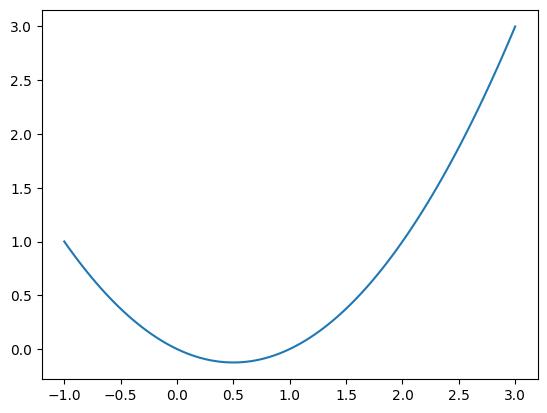

In [36]:
x= np.linspace(-1, 3, 100)
plt.plot(x, 0.5*x*x-0.5*x)

In [37]:
def y_j(x_c, x, h):
  return (x-x_c)/h

In [38]:
def x_j(x_c, y, h):
  return h*y+x_c

In [39]:
def w(x):
  return (x**2)*((1-x)**2)*np.exp(1*x)

def d4_w(x):
  return 12*np.exp(x)*(1-x)**2-36*(1-x)*np.exp(x)+12*np.exp(x)+8*x*np.exp(x)*(1-x)**2-36*x*(1-x)*np.exp(x)+48*x*np.exp(x)+22*x*x*np.exp(x)+2*x*x*x*np.exp(x)+x*x*np.exp(x)*(1-x)**2-6*(1-x)*x*x*np.exp(x)

In [40]:
x = np.arange(0,1.001,0.01)

In [41]:
kor = np.array([y_k(5,k) for k in range(1,6)])[::-1]
print(x_j(0.05,kor,0.05))

[0.00244717 0.02061074 0.05       0.07938926 0.09755283]


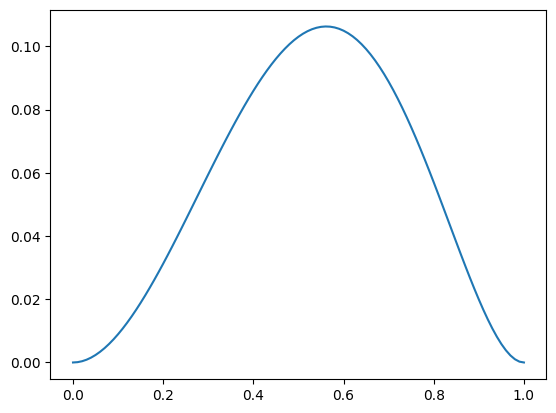

In [42]:
plt.plot(x,w(x))

In [43]:
def Gaus(A,F,N):
  x = np.zeros(N+1)
  for i in range(0,N):
    for j in range(i+1,N+1):
      coef = A[j][i]/A[i][i]
      A[j]=A[j]-A[i]*coef
      F[j] = F[j]-F[i]*coef
  for i in range(N,-1,-1):
    suma =0
    for j in range(N,i,-1):
      suma+=A[i][j]*x[j]
    #print(suma)
    x[i] = (F[i] - suma)/A[i][i]
  #print(A)
  #print(x)
  #print(F)
  return x

In [44]:
def ans(c,x,x_c,h):
  y=y_j(x_c,x,h)
  #print(y)
  ans_ = 0
  for i in range(len(c)):
    ans_+=c[i]*cheb(y,i)#/(h**i)

  return ans_

In [45]:
def dlina(x):
  dlina_x=0;
  for i in range(0,len(x)):
      dlina_x+=x[i]**2

  dlina_x = np.sqrt(dlina_x)
  return dlina_x

In [46]:
def HAUS(A):
  #print(A.shape)
  U = []
  for n in range(A.shape[1]):
    #print(A)
    A_n = A[n:,n:].copy()
    A_n = np.array(A_n)
    #print(n)
    #print(A_n.shape)
    x = np.array(A_n[:,0])

    e = np.zeros(len(x))
    e[0] = 1
    #print(x)
    u = x+np.sign(x[0])*dlina(x)*e
    #print(u)
    u = (u/dlina(u))

    u = u.reshape(-1,1)
    U.append(u)
    #print(u)
    u_t = u.copy().reshape(1,len(u))

    s= u_t.dot(A_n)
    #print(s)

    s = np.dot(u,s)
    #print(s)
    A_n = A_n -2*s

    for i in range(n,A.shape[0]):
      for j in range(n,A.shape[1]):
        A[i][j] = (A_n[i-n][j-n])
  #U = np.array(U).reshape(A.shape[1],A.shape[])
  return A, U

In [98]:
def kril(x): #size = k+1
  k = len(x)

  r = np.array([x[i+1]-x[i] for i in range(k-1)])
  A = []
  for i in range(k-2):
    A.append(r[i+1]-r[i])
  A = np.array(A)

  A = np.transpose(A)
  #print(A)
  b = -r[k-2]
  u , s, vh = np.linalg.svd(A, full_matrices=True)
  E = np.zeros(len(s)*len(s)).reshape(len(s),len(s))
  #print(u)
  for i in range(len(s)):
    E[i][i] = s[i]
  b_new = (np.transpose(u)).dot(b)

  y= Gaus(E.copy(),b_new.copy(),len(s)-1)
  alpha = Gaus(vh.copy(),y.copy(),len(s)-1)

  x_n = x[k-1].copy()
  length = alpha.size
#   print(alpha.shape)
  for i in range(length):
#     print(i)
    x_n = x_n+alpha[i]*r[i+1]
  return x_n

In [99]:
def oshibka(x_2h,x_c,c,K,h):
  kol = 5
  x_now = np.array([np.linspace(x_2h[i],x_2h[i+1],kol) for i in range(K)])
  ans_ = np.array([ans(c[i],x_now[i],x_c[i],h) for i in range(K)])
  return np.abs(ans_.reshape(K*kol)-w(x_now.reshape(K*kol))).max()

In [128]:
A = []
R = []
U = []
N=5
kor = np.array([y_k(N+1,i+1) for i in range(0,N+1)])[::-1]
#print(kor)
K=3
l=1
h = l/(2*K)
p_m = np.array([1,h,h**2,h**3])
p_b = np.array([1,h])
p_c = h**4
for k in [0,1,K-1]:
    #print(k)

    A_i = []
    #print(x_j(x_c[k],kor,h))
    if(k<K-1):
      if(k>0):
        for i in range(N+1):
          A_i.append(p_m[0]*cheb(1,i)+p_m[1]*d_cheb(1,i)/h)
        for i in range(N+1):
          A_i.append(p_m[0]*cheb(-1,i)-p_m[1]*d_cheb(-1,i)/h)



        for i in range(N+1):
          A_i.append(p_m[2]*d2_cheb(1,i)/(h*h)+p_m[3]*d3_cheb(1,i)/(h**3))
        for i in range(N+1):
          A_i.append(p_m[2]*d2_cheb(-1,i)/(h*h)-p_m[3]*d3_cheb(-1,i)/(h**3))
      else:
        for i in range(N+1):
          A_i.append(p_m[0]*cheb(1,i)+p_m[1]*d_cheb(1,i)/h)

        for i in range(N+1):
          A_i.append(p_b[0]*cheb(-1,i))

        for i in range(N+1):
          A_i.append(p_m[2]*d2_cheb(1,i)/(h*h)+p_m[3]*d3_cheb(1,i)/(h**3))



        for i in range(N+1):
          A_i.append(p_b[1]*d_cheb(-1,i)/h)

    else:
      #print(k)

      for i in range(N+1):
        A_i.append(p_b[0]*cheb(1,i))

      for i in range(N+1):
          A_i.append(p_m[0]*cheb(-1,i)-p_m[1]*d_cheb(-1,i)/h)

      for i in range(N+1):
        A_i.append(p_b[1]*d_cheb(1,i)/h)

      for i in range(N+1):
          A_i.append(p_m[2]*d2_cheb(-1,i)/(h*h)-p_m[3]*d3_cheb(-1,i)/(h**3))


    for j in kor:
      for i in range(N+1):
        koef = p_c*d4_cheb(j,i)/(h**4)
        #print(koef)
        A_i.append(koef)
      #print(j,x_j(x_c[k],j,h))



    A_i = np.array(A_i).reshape(N+5,N+1)
    #print(A_i)
    R_i, U_i=(HAUS(A_i.copy()))
    R.append(R_i)
    U.append(U_i)
    A.append(A_i)

def MKNK(K, C=np.zeros(1), u_old=np.zeros(1)):
  koefff = 80 #int((N+1)*K*0.75)
  print("koef=",koefff)
  x_osh = []
  y_osh = []
  x_i = []
#   K = 10 #np.array([5,10,20,40,80,160])
  l = 1
  e = 1e-10
  h = l/(2*K)
  #print(h)
  print(K)
  x_2h = np.linspace(0,l,K+1)
  x_c = np.array([ (x_2h[i+1]+x_2h[i])/2 for i in range(0,K)]  )
  if(len(C)==1):  c = np.array([0.4]*(N+1)*(K)).reshape(K,N+1)
  else:
    #print((x_2h[0]+x_2h[1])/2)
    c = np.array([C[i//2] for i in range(K)]).reshape(K,N+1)
    for i in range(K):
      X_center_2 = (x_2h[i]+x_2h[i+1])/2
      if(i%2==0):
        X_center_1 = x_2h[i+1]
      else:
        x_center_1 = x_2h[i]
      d = (X_center_2-X_center_1)/(2*h)
      cc = np.zeros(N+1)
      cc[0] = c[i][0]+c[i][1]*d+c[i][2]*d*d+c[i][3]*d*d*d+c[i][4]*d**4
      cc[1] = c[i][1]/2+c[i][2]*d+c[i][3]*3/2*d*d+c[i][4]*2*d*d*d
      cc[2] = c[i][2]/4+c[i][3]*3/4*d+c[i][4]*3/2*d*d
      cc[3] = c[i][3]/8+c[i][4]/2*d
      cc[4] = c[i][4]/16

      #cc[0] = c[i][0]/2+c[i][1]*d+c[i][2]*(2*d*d-1)+c[i][3]*(4*d*d*d-3*d)+c[i][4]*(8*(d**4)-8*d*d+1)
      #cc[1] = c[i][1]/2+c[i][2]*2*d+c[i][3]*(2*3*d*d-1.5)+c[i][4]*(16*d*d*d-4*d)
      #cc[2] = c[i][2]/2+c[i][3]*3*d+c[i][4]*(4*3*d*d-3)
      #cc[3] = c[i][3]/2+c[i][4]*4*d
      #cc[4] = c[i][4]/2
      #print(np.abs(c[i]-cc).max())
      c[i] = cc.copy()

    #c = np.array([C[i//2] for i in range(K)]).reshape(K,N+1)
  p_c = h**4

  p_m = np.array([1,h,h**2,h**3])
  p_b = np.array([1,h])
  c_prev = np.zeros(c.shape)
  #print(c_prev)
  iter =0




  #print(A)
  #print(A_T)
  time_1 = time.time()
  #x_osh.append(iter)
  #y_osh.append(oshibka(x_2h,x_c,c,K,h))
  while((np.abs(c-c_prev).max()>e)):
    print(np.abs(c-c_prev).max())
    #print(c[0])
    #print(c)
    #print(iter, y_osh[len(y_osh)-1])
    if(iter>0):
      x_i.append((c.copy()).reshape(c.shape[0]*c.shape[1]))

      if(iter%koefff==0):
          #iter+=1
          #if((y_osh[len(y_osh)-1]-y_osh[len(y_osh)-2])<0):
          c=kril(x_i.copy()).reshape(K,N+1)
          #x_i.append((c.copy()).reshape(c.shape[0]*c.shape[1]))
          x_i = []

    iter+=1

    c_prev = c.copy()
    #print(iter)
    for k in range(0,K):
      #print(k)

      A_i = []

      U_i = []
      R_i = []
      if(k==0):
        A_i = A[0]

        U_i = U[0]
        R_i = R[0]
      else:
        if(k==K-1):
          A_i = A[2]

          U_i = U[2]
          R_i = R[2]
        else:
          A_i = A[1]

          U_i = U[1]
          R_i = R[1]

      b = []
      if(k<K-1):
        if(k>0):

          right = 0
          for i in range(N+1):
            right+=c[k+1][i]*(p_m[0]*cheb(-1,i)+p_m[1]*d_cheb(-1,i)/h)
          b.append(right)
          left = 0
          for i in range(N+1):
            left+=c[k-1][i]*(p_m[0]*cheb(1,i)-p_m[1]*d_cheb(1,i)/h)
          b.append(left)


          right=0
          for i in range(N+1):
            right+=c[k+1][i]*(p_m[2]*d2_cheb(-1,i)/(h*h)+p_m[3]*d3_cheb(-1,i)/(h**3))
          b.append(right)
          left = 0
          for i in range(N+1):
            left+=c[k-1][i]*(p_m[2]*d2_cheb(1,i)/(h*h)-p_m[3]*d3_cheb(1,i)/(h**3))
          b.append(left)
        else:
          right = 0
          for i in range(N+1):
            right+=c[k+1][i]*(p_m[0]*cheb(-1,i)+p_m[1]*d_cheb(-1,i)/h)
          b.append(right)
          b.append(0)
          right=0
          for i in range(N+1):
            right+=c[k+1][i]*(p_m[2]*d2_cheb(-1,i)/(h*h)+p_m[3]*d3_cheb(-1,i)/(h**3))
          b.append(right)
          b.append(0)

      else:
        #print(k)
        b.append(0)
        left = 0
        for i in range(N+1):
            left+=c[k-1][i]*(p_m[0]*cheb(1,i)-p_m[1]*d_cheb(1,i)/h)
        b.append(left)
        b.append(0)
        left = 0
        for i in range(N+1):
            left+=c[k-1][i]*(p_m[2]*d2_cheb(1,i)/(h*h)-p_m[3]*d3_cheb(1,i)/(h**3))
        b.append(left)







      #print(x_j(x_c[k],kor,h))
      for j in kor:
        b.append(p_c*d4_w(x_j(x_c[k],j,h)))
      #if(c[0][0]==0.4):
      #  print(b)

      b = np.array(b)
      #print(b)
      for n in range(A_i.shape[1]):
        b_n = np.array(b[n:])

        b_n= b_n.reshape(len(b_n),1)
        u= U_i[n]
        u_t = u.reshape(1,len(u))
        s = u_t.dot(b_n)

        s = u.dot(s)




        b_n = b_n -2*s

        b_n = b_n.reshape(-1,1)

        for i in range(n,A_i.shape[0]):
          b[i] = b_n[i-n]

      #A_i_T = np.transpose(A_i)
      #b = A_i_T.dot(b)
      #A_i_T_A_i_inv = np.linalg.inv(A_i_T.dot(A_i))
      #c[k] = A_i_T_A_i_inv.dot(b)

      #A_i_T_A_i = A_i_T.dot(A_i)
      c[k] = Gaus(R_i.copy(), b.copy(), N)#(A_i_T_A_i_inv.dot(b))#[::-1]
    #print(c)
    #print()
    x_osh.append(iter)
    y_osh.append((np.abs(c-c_prev).max()))
    #x_osh.append(iter)
    #y_osh.append(oshibka(x_2h,x_c,c,K,h))
      #print(c[k])
      #print(A_i)
      #print(b)
  time_2 = time.time()
  #print(K)
  print(iter)
  print(time_2-time_1)
  # 5 10 20 40 80 160
  # 5*160 10*80 20*40 80*10 160*5
  kol = 100*int(800/K)
  x_now = np.array([np.linspace(x_2h[i],x_2h[i+1],kol, endpoint=False) for i in range(K)])
  ans_ = np.array([ans(c[i],x_now[i],x_c[i],h) for i in range(K)])
  #print(x_now)
  #plt.subplots(figsize=(7,7))

  #plt.show()

  plt.plot(x_now.reshape(K*kol),1*w(x_now.reshape(K*kol)), lw=6,alpha=1, label = 'Точное решение')
  plt.plot(x_now.reshape(K*kol),1*ans_.reshape(K*kol), lw=3, label = f'Решение МКНК K={K}')
  plt.grid()
  plt.xlabel("x", size=20)
  plt.ylabel("y", size=20)
  plt.xticks(size=15)
  plt.yticks(size=15)
  plt.legend(prop={'size': 15})
  plt.show()

  plt.subplots(figsize=(7,7))
  plt.plot(x_osh,y_osh, label = f'Ошибка K={K}')
  plt.xlabel("iter", size=20)
  plt.ylabel("Ошибка", size=20)
  plt.xticks(size=15)
  plt.yticks(size=15 )
  plt.legend(prop={'size': 15})
  plt.grid()
  plt.show()

  #plt.show()
  #u(x+1)h = u(x)+hu'+h^2*u''/2
  #u(x+1)2h = u(x)+2h*u' +2*h^2*u''
  #ans_new = 4u+4hu'+2h^2*u''-u-2h*u' -2*h^2
  print("{:e}".format(np.abs(ans_.reshape(K*kol)-w(x_now.reshape(K*kol))).max()/np.abs(w(x_now.reshape(K*kol))).max()))
  print("{:e}".format(np.abs(ans_.reshape(K*kol)-w(x_now.reshape(K*kol))).max()))
  if(len(u_old)!=1):
    print('новая погрешность')
    ans_new = (4*ans_.reshape(K*kol)-u_old)/3
    print("{:e}".format(np.abs(ans_new-w(x_now.reshape(K*kol))).max()/np.abs(w(x_now.reshape(K*kol))).max()))
    print("{:e}".format(np.abs(ans_new-w(x_now.reshape(K*kol))).max()))
  print()
  #print(U)
  return c, ans_.reshape(K*kol)

In [129]:
kk = ([80])
c = np.zeros(1)
u_old = np.zeros(1)
for k in kk:
  c= np.zeros(1)
  if(len(c)==1): c, u_old = MKNK(k)
  else: c, u_old = MKNK(k,c,u_old )

koef= 80
80
0.4
685.9999995967935
851.1999987891786
851.1999977442586
851.199996475762
851.1999949877868
851.1999933084103
851.1999914135531
851.1999892801523
851.1999869883339
851.1999844904103
851.1999817784017
851.1999788553512
851.1999757229478
851.1999723806875
851.199968825329
851.199965050726
851.1999610478197
851.1999568048814
851.1999524091898
851.1999440464242
851.1999245858169
851.1998803146089
851.1997828474086
851.1995755018943
851.1991489120664
851.1982997094929
851.1974459200101
851.1954632303787
851.193201320657
851.188806782
851.1840940798284
851.1755324471596
851.1659699307202
851.1525057329854
851.131454577564
851.1108727019855
851.0817431759097
851.0405734965534
850.9961276542344
850.9430239266803
850.8738587258777
850.7845091802155
850.6918678671937
850.5847202965451
850.4539763248322
850.29554448821
850.105139140258
849.9180750474843
849.7029573901818
849.4538308129122
849.1669334086037
848.8385043332528
848.4648317075407
848.0964316621976
847.6908364010887
847.23

61.92002751007385
62.89699453905632
63.866922251385404
64.82991806633072
65.78608830405574
66.73553810839076
67.67837137679453
68.61469069463783
69.54459727545327
70.4681909072824
71.38556990191864
72.2968310508877
73.2020695846586
74.10137913642393
74.99485171036213
75.88257765315939
76.7646456296643
77.64114260210772
78.51215381243674
79.377762768112
80.23805123078637
81.09309920814121
81.94298494809482
82.78778493587743
83.6275738937984
84.4624247828906
85.29240880697034
86.11759541886568
86.93869451014325
2.694070536075742
3.870029922341928
5.230754635791527
6.6700273825990735
8.19581840763567
9.72866046371928
11.27893700505956
12.836840598320123
14.39239210341475
15.93719131744001
17.484904257726157
19.01384586338827
20.524934058717918
22.03761667193612
23.537424451715196
25.021243984083412
26.48952510363597
27.942676188104087
29.381069974901038
30.809722273101215
32.23358823546732
33.643402450485155
35.039387159311445
36.421754410432186
37.790707813663175
39.14644409008906
40.489

37.37639865327219
38.61363874822564
39.84173439233564
41.06071495678043
42.27061533091182
43.47147590300301
44.66334249045758
45.84626622487849
47.02030339735211
48.18551526944793
49.34196785562381
50.49129760908545
51.63431332378241
52.76901847125555
53.895482918815105
55.013779864500975
56.123985602273024
57.22617928101681
58.320442659329274
59.40685986143944
60.48551713277993
61.55650259957474
62.61990603368031
63.67581862224324
64.72433274528885
65.76554176006175
66.79953979462152
67.82642154983478
68.84628210989467
69.85921676311409
70.86532083143538
71.86468950963172
72.85741771377798
73.84359993868566
74.82333012584422
75.79670153869665
76.76380664687895
77.72473702051502
78.67958323084167
79.62843475955015
80.57137991659692
81.50850576360244
82.43989804587909
83.36564113096392
84.28581795233185
85.20050996106875
86.10979708218656
87.01375767664285
87.91246850891912
88.80600471925572
89.69443980096548
90.57784558145795
91.45629220790579
92.32984813707299
2.900510626117466
3.9380

2.379559199893265
3.474276374618057
4.772997977153864
6.089927906316007
7.502028032715316
8.911737540955073
10.318486565549392
11.734257783857174
13.152684437605785
14.568390506319702
15.975550506540458
17.37340980573208
18.761744197196094
20.14048651274061
21.509639603231335
22.869229874995654
24.219287783809705
25.559843544397154
26.89092715679726
28.212567985465284
29.52479405896156
30.82763161676121
32.12110526794277
33.40523861775
34.68005511142837
35.94557894344325
37.201835940999445
38.44885436462937
39.686665595159866
40.91530469460122
42.1348108384409
43.34522762479901
44.546603270762716
45.738990708850906
46.92244759637106
48.09703625336988
49.26282353948045
50.41988068347564
51.56828307417163
52.708110022955225
53.841941778809996
54.96940918121254
56.08875367497967
57.200054595436086
58.303393929687445
59.39885606682219
60.486527547225705
61.566496816667495
62.6388539847394
63.70369058937649
64.76109936888679
65.81117404201359
66.85400909704913
67.88969958960661
68.918340950

69.06043838201731
70.08806756891136
71.10861280621612
72.12217241968028
73.1288446754188
74.12872761684412
75.12191891227849
76.10851571215608
77.0886145154509
78.06231104643666
79.02970013993036
79.99087563551439
80.94593028080999
81.89495564192475
82.8380420231988
83.77527839320828
84.70675231859786
85.63254990470887
86.55275574297411
87.46745286385703
88.3767226961645
89.28064503193309
90.17929799627746
91.07275802252116
91.96109983151837
92.84439641571953
93.72271902731154
3.021641055238433
4.115133054525359
5.547428270088858
7.080342828805442
8.6359810019203
10.203379631246207
11.796423576393863
13.384101080751861
14.983340588427382
16.576139168668306
18.15959120010666
19.73429935312015
21.300160465631052
22.856853100616718
24.40405026242661
25.941457929075113
27.468829151184764
28.98596737840853
30.492722650727956
31.988982396462234
33.474663161250646
34.949704432394356
36.41406411729986
37.86771525301447
39.31064361143217
40.74284596009238
42.16432879217609
43.57510739019199
44.

37.24625118763652
38.531940956789185
39.80832433285832
41.07536773644097
42.33305188026861
43.581370809319196
44.82033095207589
46.04995019757189
47.270257010517525
48.48128958667803
49.68309505247453
50.875728708226234
52.05925331392791
53.2337384155835
54.39925971116463
55.55589845275972
56.70866755046882
57.85310322532314
58.98909723070392
60.1167365686706
61.23611114559753
62.34731342973828
63.450438126397785
64.54558187139628
65.63284294077312
66.71232097751636
67.78411673290248
68.84833182222792
69.90506849554367
70.95442942129739
71.99651748323231
73.03143558961165
74.05928649535053
75.08017263458169
76.09419596566295
77.10145782626932
78.10205879903515
79.09609858742624
80.08367590099806
81.06488834983611
82.03983234790212
83.00860302460205
83.97129414480878
84.92799803617527
85.87880552375282
86.82380587192893
87.76308673244785
88.69673409921234
89.62483226833865
90.5474638051528
91.46470951405354
92.37664841645164
93.28335773067374
94.18491285800701
95.08138737198897
2.869567

86.02223086611775
86.87295649986481
87.71912866854109
2.8894707339641172
4.1316624881728785
5.602155848957409
6.990341195376459
8.398316604929278
9.897187338006916
11.387698714141152
12.866501269119908
14.337331515096594
15.801274007448228
17.26242720754817
18.722785297388327
20.176612113951705
21.62336217268603
23.062604708364233
24.493974606491975
25.920696989938733
27.342060014489107
28.75457119665225
30.15800767519977
31.552184144602506
32.9369498120941
34.3121844149573
35.67779426681227
37.033708747942
38.37987732584588
39.71626706975803
41.04286058949947
42.359654327854514
43.66665713679686
44.963889080041554
46.25138041138416
47.52917069145769
48.79730801029655
50.05584829094005
51.304854658665136
52.544396858109394
53.77455071006261
54.99539760054904
56.2070239954337
57.4110463923862
58.60946848412277
59.79915268534387
60.980190981324995
62.15267789726204
63.31671022961382
64.47238678291615
65.61980811212561
66.75907627270499
67.8902945775335
69.01356736238813
70.1289997608983


63.95323571724293
65.01681155286497
66.0783562422148
67.13275387891917
68.18009832940879
69.22048410848947
70.2540061451873
71.28075956361135
72.30083947784442
73.3143408014439
74.32135806992301
75.3219852768816
76.31631572247716
77.30444187496323
78.28645524257445
79.26244625778054
80.23250417152303
81.19671695813304
82.15517122957681
83.10795215847611
84.05514341047092
84.99682708429464
85.9330836594163
86.86399195124977
87.78962907315872
88.71007040356926
89.62538956124627
90.53565838407667
91.44094691357168
92.34132338491327
93.23685422044946
3.566516377570224
4.51643785503984
5.862278357511968
7.1858743975899415
8.543571601607255
9.94886986585334
11.423673134544515
12.907951109373244
14.411469655271503
15.930272295023315
17.448774419986876
18.96387850078463
20.467362464420148
21.959116647791234
23.43939707701793
24.908434401993873
26.368111304953345
27.81916558058583
29.25948818717734
30.689149028476095
32.10821969296376
33.51676945673535
34.914863651414635
36.30256343970541
37.67

22.744912472073338
23.714176020468585
24.677660605928395
25.63532507920172
26.58776403257798
27.537493542637094
28.481669782398967
29.42027828132268
30.353310991937178
31.28076592020807
32.202646812278545
33.118962877226295
34.029728527675616
34.93496312860225
35.8346907459636
36.728939890890615
37.61774325717124
38.501137451734394
39.379162718119915
40.251862654520664
41.119283929423545
41.98147599522781
42.838490803929744
43.69358218052366
44.54556424864859
45.39265817684645
46.23491382758948
47.07238250358205
47.905116713111056
48.733169946441194
49.55659646335698
50.37545109313214
51.1897890465043
51.99966573956772
52.80513663032616
53.60625706629071
54.40308214502875
55.19566658475378
55.98406460674596
56.76832982832275
57.5485151650646
58.3246727441292
59.09685382533644
59.865108731770306
60.62948678835528
61.39003626808699
62.14680434591719
62.89983705863415
63.649179271946196
64.39524070943298
65.14190814552421
65.88500878692139
66.62457907297357
67.36065438242804
68.0932690246

13.532174804560782
13.679469758360938
13.825229719999697
13.969467294173228
14.112195145919031
14.253425992284974
14.3931725944949
14.531447750427105
14.668264287418424
14.803635055344785
14.937654776782438
15.075130469464057
15.211267359634803
15.346076331039512
15.479568255605045
0.5771481178962858
0.6850303740047821
0.8567667377628823
1.0524446188846923
1.2712291575771815
1.5057773223179538
1.7464031655363215
1.9870225027680135
2.228844501052663
2.469772723499773
2.7074340588169434
2.9417458354946575
3.172863923740806
3.4009225494337443
3.626026558386002
3.8482578506282152
4.06767973532078
4.284345151070738
4.498302601152318
4.710395549127497
4.920531270310676
5.128277242080003
5.333665816715438
5.53672510339311
5.7374791398397065
5.935948206917601
6.132149235201723
6.3260962647691485
6.517800925334086
6.707272910283791
6.894520424755683
7.079550595030014
7.262369831740216
7.44322392254071
7.624391211767943
7.803496858321523
7.980543854526331
8.155535806063199
8.328476997980033
8.49

5.5540458534169375
5.681246262316563
5.806445206072567
5.929649767040246
6.050869585435066
6.17011660299886
6.2874048161866085
6.402750041340369
6.516169693514712
6.627682579931388
6.737308708597084
6.845069112080637
6.950985686307831
7.055081043889913
7.159010798303825
7.2622929600611315
7.36391323251064
7.463890908959911
7.562245724557215
7.658997768004156
7.754167402219537
7.847775193415146
7.939841847865864
8.030388155707442
8.119434941287182
8.207003019374497
8.293113156712025
8.377786038494378
8.462710112708919
8.547743923949383
8.631455081527747
8.71386112579603
8.79497950626046
8.87482756353711
8.953422513664918
9.030781434727032
9.106921255382986
9.181858745175305
9.25561050640863
9.32819296740854
9.39962237700729
9.469914800147308
9.541551894540135
9.613051211204038
9.683496153577835
9.752900300930378
0.4603705878389519
0.5304030500660701
0.7449214075352302
0.9329652342516965
1.0982606798613688
1.2474546946759801
1.3816551333986808
1.501655595595139
1.6091571607162223
1.70595

1.800391219015978
1.8798512148687223
1.9445402222254415
1.995667734717017
2.062509823782193
2.1197543626058177
2.1868003318838873
2.253987998230059
2.3557983685404906
2.4948507985900505
2.6346287529031542
2.7741662027383427
2.912521311243836
3.049518189516675
3.185002269488905
3.3188407971338165
3.450921930622826
3.5811531222398116
3.7094592241528517
3.8357805721561817
3.9600711705788854
4.08229702503013
4.202434632370569
4.3204696223747305
4.436395540396006
4.550212759563692
4.6619275113234835
4.771551023891334
4.879098758741748
4.984589736000089
5.088083057647964
5.1915321503938685
5.293119339014993
5.3928638875649995
5.490786727536033
5.586910171850832
5.68125766076264
5.7738535369444435
5.864722847139092
5.953891167969232
6.041384453525097
6.127228902626484
6.21145084375712
6.294076635822421
6.375132583004415
6.456945543321126
6.537468736791197
6.616554404879025
6.6942245682184875
6.7705011344933155
6.845405857920923
6.918960304849861
6.9911858248206045
7.062103526464853
7.13173425

4.860999368566354
4.912757312697522
4.964922603646755
5.016077136995591
5.066235867219348
5.115413555113264
5.163624761910796
5.210883844883028
5.257204954209556
5.302602031004426
5.347088806332977
5.39067880112043
5.433385326814459
5.475221486702594
5.516200177800783
5.556334093208989
5.595635724865588
5.634117366627834
5.671791117624707
5.7086688857943955
5.744762391606855
5.780662328074413
5.816999098787164
5.8526000511274106
5.887475379888201
0.37248661880221334
0.6491685659864288
0.8501631297436916
1.0061941596187012
1.1163278356124238
1.2057156348165563
1.2768491208877322
1.3277860748966077
1.3668974136925272
1.4110712688461717
1.4446146537903815
1.4790384943480603
1.5178340589662866
1.5887386646886625
1.6907680132703717
1.7913548888514015
1.890554241736936
1.9885023581878158
2.0884859438574495
2.187154209052551
2.284494096524213
2.3804943310965427
2.4754069919686117
2.571164894381127
2.6653797230719647
2.758036412053116
2.8491254552222927
2.938642220979091
3.026586341949951
3.11

3.1305521127887914
3.231908723644665
3.331605523039798
3.429633277881294
3.5259872728024675
3.620666860827896
3.71367504793443
3.8050181055614303
3.8947052073226587
3.9827480878316237
4.0691607226958695
4.153959029505586
4.237160589839277
4.318784392407906
4.398850597291585
4.477380321043256
4.5543954421527815
4.629918426229779
4.703972169953431
4.776579862822018
4.847764865525733
4.917550603779546
4.9859604763619245
5.053017776161141
5.118745623032737
5.183166907288069
5.246304242756651
5.308179928349546
5.3688159171665575
5.428233792286392
5.486454748369397
5.5444151314836745
5.602183831480488
5.658858539416087
5.7144559422754355
5.768992500998593
5.82248444075185
5.874947743651319
5.926398143660208
5.976851123362394
6.02632191234261
6.074825486974532
6.122376571368022
6.1689896393277195
6.214678917132005
6.259458386988626
6.303341791065577
6.346342635949895
6.38847419741478
6.430414584559458
6.472981250680277
6.514735568915967
6.555688863186333
6.595852300489696
6.635236892830562
0.

6.443334998226419
6.48409532624828
6.524077779850359
6.563292809843006
0.27894437592749455
0.48526838980728826
0.6665785590685118
0.826669532285905
0.9639391043626802
1.084990683882097
1.1889463403471154
1.281003701095301
1.3645687319047966
1.464832190159541
1.5779756286156044
1.6886009402496711
1.7970152626257914
1.9071902393566234
2.016494607349159
2.12423701081525
2.2305269829748795
2.335451461413413
2.439076553126597
2.5447160198400525
2.6501562198027386
2.7542097438226847
2.856876332311458
2.958152767606407
3.058034086455791
3.1577623471753213
3.257640357110631
3.355850697684673
3.4523926254364596
3.5472682705308216
3.640482525682728
3.7320428938332952
3.8219593052212986
3.910243913537215
3.9969108795071406
4.081976149120237
4.165457232393692
4.247372987275412
4.327743412406107
4.406589451271884
4.483932809588623
4.559795787057283
4.634201124017636
4.707171863100484
4.778731225677802
4.848902502578312
4.917708958372714
4.9851737484486875
5.051319847933428
5.116169991518291
5.17974

4.214378638836479
4.279354676647472
4.343035819675151
4.405443268262388
4.4665981173361615
4.526521294872509
4.58523351104941
4.64275521675745
4.6991065703241475
4.754307411358695
4.808377240806749
4.861335206298008
4.91320009210267
4.963990312955957
5.01372391121231
5.062418556739885
5.110091549160188
5.156759821973992
5.2039542132911265
5.250431770557498
5.295979105872902
5.340609966829106
5.384337888281607
5.427176193286414
5.4691379948239955
5.510236198153507
5.550483503677242
5.5898924102511955
5.628475218797121
5.66624403619744
5.703210779355686
5.739387179396999
5.774784785946849
5.809414971440674
5.843288935426244
5.876417708848294
5.908812158262208
0.3585940554228273
0.6322183101902965
0.8526829731770249
1.0243431233313345
1.1597352013212685
1.2629182164884583
1.3395966749843637
1.3944899094877883
1.4313644205271316
1.4658155467873257
1.4974916128319364
1.5202694131928638
1.5441882119677075
1.575017751547989
1.6060284000109277
1.701892172312455
1.7970115250714116
1.89178561827

1.3377161851583423
1.3619336441239511
1.4211601293472995
1.51250583687397
1.6030854567638926
1.692918708378329
1.7820011292383242
1.872607791811788
1.962434026048868
2.0513596448618046
2.1393233483290715
2.226266319461047
2.312133632653513
2.396875201050534
2.480691671421482
2.5642635235299167
2.646408723734112
2.727103591381365
2.8063312007880086
2.884080795947284
2.9603471838308906
3.035130126635977
3.1084337485467586
3.1802659682839476
3.250637965365968
3.3195636850246046
3.387059384573604
3.4531432222115654
3.5178348879703663
3.5811552755599223
3.6431261931220433
3.7038336085333867
3.7642122004867815
3.823380868534514
3.881357527848195
3.938160383288505
3.9938078101458814
4.048318252354875
4.101710136440488
4.154001799444359
4.205211429289648
4.255357016050311
4.304456312802813
4.352526804782428
4.3995856857450235
4.445649840502938
4.490735832740484
4.534859897281422
4.578037936128567
4.620285517634784
4.661617878227389
4.70204992626077
4.741596247537018
4.781695279963515
4.8210694

3.6314889138388935
3.666641542473826
3.7010043427014807
3.7345888997178918
3.7674066433175994
3.799468844977582
3.830786616311343
3.861370908628942
3.891232513422665
3.921491444983758
3.9510961301759835
3.9800188399017316
4.008269155612879
4.035856533168499
4.062790303971724
4.089079676380834
4.114733737335882
4.139761454138352
4.164171676350179
4.187973137762583
4.211174458421738
4.233784146660355
4.255810601139501
0.18754617973763743
0.2758161259787357
0.3659823293221507
0.45183897627225633
0.535516676175348
0.615136386405311
0.6922982152873374
0.7679553488294459
0.8424763280349907
0.9160697345344033
0.9888076077970709
1.0609621136386522
1.1336333383503643
1.205608375094016
1.2768821282347744
1.3474439142323718
1.4172773578218312
1.4863615408303303
1.554672681073498
1.6221855853091256
1.6898189658431875
1.7567760236559025
1.8227542623269528
1.8877308402272774
1.951686323169497
2.01460467272409
2.076473161383319
2.137282232556572
2.1970253196789145
2.2556986364404565
2.313300948611868

1.3869750693386322
1.4507900391308794
1.513734971350459
1.5757885381251526
1.6369323332801287
1.697150737283664
1.756430801707893
1.8147621309808528
1.8721367512223424
1.928548963847561
1.9839951859210032
2.0384737811400555
2.0919848859791728
2.144530235421371
2.1961129921373868
2.246737582271635
2.2964095400830047
2.345135363044392
2.392922378232697
2.439778620425841
2.4857127218485857
2.530733813279312
2.5748514359802357
2.618075463815103
2.6604160348081223
2.7018834913797036
2.7424883284804764
2.7822411488295984
2.821985528295727
2.860973117624553
2.899160916339497
2.936558257533079
2.973174526970979
3.0090191407537077
3.0441015261592383
3.0784311052927933
3.112017281194312
3.1448694260982393
3.1769968715591403
3.208408900191216
3.2391147388148056
3.269123552790006
3.298444441390984
3.327086434037483
3.3550584872903073
3.3823694824545782
3.4090282237357314
3.435043436809565
3.4604237677897345
3.485177782482424
3.5093139659054486
3.5337706025200077
3.5576628954347598
3.58097033665762

2.989221972336736
3.0173032739596692
3.044741481263827
3.0715441299132635
3.097718744212898
3.1232728342909013
3.1482138934313753
3.172549395524811
3.196286792638375
3.2194335126973783
3.241996957267702
3.263984499434855
3.2854034817726188
3.3062612143980914
3.326564973117911
3.346321997637915
3.3655394898644317
3.384224612276512
3.402384486364099
3.4200261911489633
3.4371567617611163
3.453810659324972
3.470932932369351
0.12180876294110021
0.18959287775533085
0.2645506700621354
0.34100749770209404
0.41667819390136174
0.4912950302777972
0.5648766183821863
0.6374687869258651
0.7090399482135581
0.779599446955217
0.8491487534747648
0.9176829192383593
0.9851902069385687
1.0516653128818234
1.1171077561684797
1.1815189958490464
1.2450310014501156
1.3077525122635052
1.369419564243799
1.4300304651460465
1.4895854851447439
1.5480866383811644
1.6055374606855821
1.661942794746892
1.7173085946453739
1.7716417558815465
1.8249499710054806
1.877241607586484
1.9285256044927337
1.9788113827996767
2.0281

1.2203543564244228
1.2808199137173233
1.3403899527756948
1.3990903857234116
1.4567182359612616
1.5132919347463485
1.5688284063523952
1.623343235847642
1.676850830051535
1.7293645684765124
1.7808969424095267
1.8314596814946071
1.881063868012916
1.9297200395412801
1.9774382807513575
2.0242283050761216
2.0700995269326086
2.1150611251262035
2.159122098046737
2.202291311290537
2.244577538307567
2.2859894947057455
2.3265358668013505
2.3662253350230458
2.4050665927097725
2.443068360860252
2.4802393993120404
2.5165885148301186
2.5521245665156584
2.586856468924907
2.621603246068389
2.6556393355840555
2.688925673629001
2.7214703240385916
2.7532813851464653
2.7843669900851182
2.8147353060658133
2.844394532806291
2.873352900251348
2.9016186657297567
2.929200110659167
2.9561055368944835
2.9823432628109003
3.0079216191984415
3.032848945030082
3.057133583148243
3.0807838759349124
3.10380816098359
3.126214766819885
3.148012008691694
3.1692081844448694
3.1899390326514094
3.2110648442178444
3.2316257431

3.066601675000129
3.0940820707894545
3.1208442528400155
3.146898284964209
3.1722542217585215
3.1969221009992452
3.220911936464745
3.2442337111738198
3.2668973710431146
3.2889128189362964
3.3102899090945357
3.3310384419539787
3.3511681593072353
3.3706887398184335
3.3896097948663737
3.4079408647012315
3.4256914149013937
3.4435606928564084
3.461523217104059
3.4789390953028487
3.4958166590754445
3.5121641789964997
3.5279898620015047
3.543301849002546
0.13055064956029128
0.19727281844802746
0.27981300855549307
0.3667427066361597
0.44895921532406646
0.5319566344992381
0.6149435045492737
0.6963652073998219
0.7761408614246648
0.8546686465006132
0.931636612821876
1.0070939335278126
1.0810811618196112
1.1536340717145777
1.2247792479902273
1.2945375414849423
1.3629260047537173
1.429958543808425
1.4956469289447796
1.5600016252194564
1.6230323780223443
1.6847486127785487
1.7451597136825967
1.8042752213646054
1.8621049712073727
1.9193964353737556
1.975689041804344
2.0307850029548717
2.08469375470895

1.483157315141625
1.5509048544352027
1.6172813059904456
1.6822873097166848
1.7459252308501618
1.8081990853213483
1.8691144318518127
1.9286782532219604
1.9868988377554615
2.043785666239728
2.099349306246495
2.154022295168943
2.2081390912846928
2.2610306911315092
2.312707832288879
2.363181952462128
2.412465129666998
2.4605700241183968
2.5075098219967913
2.5532981812993967
2.5979491799710104
2.6414772664602424
2.6838972128161913
2.7252240704076485
2.7654731282671037
2.8046598740702393
2.8427999577052105
2.8806441379670105
2.918190541700369
2.954767553225338
2.9903891122773985
3.0250692415399953
3.058822023378525
3.091661578285766
3.1236020449621265
3.154657561927479
3.184842250602287
3.2141701997582004
3.2426554512639996
3.270311987040486
3.2971537171595173
3.3231944689937336
3.3484479773719613
3.3729278756461554
3.3978178071367893
3.422343238807116
3.4461474310494395
3.469242318257102
3.491639743760288
3.513351454213307
3.5343890945023304
3.554764203173818
3.5744882083215543
3.5935724239

3.4721096400128317
3.4967019475550387
3.5217073954468106
3.545971972167308
3.5695081476346786
3.592328288585122
3.6144446531834546
3.635869386182776
3.65661451458368
3.676691943757305
3.69611345402177
3.7148906976005946
3.733035195974253
3.750558337567327
3.7674713757719474
3.7837854272502227
3.7995114705331616
3.8146603448617498
3.829242749270634
3.844656889717953
0.13835044208417457
0.21502631351086166
0.30294219335587513
0.3902416391940733
0.478275365178888
0.5653920319823555
0.6516581803957706
0.7364974723852811
0.8199882919652737
0.9020755435237788
0.9827137130389474
1.061880659346798
1.1395607027159258
1.2157477234020462
1.2904681333786812
1.3643133693215077
1.4367569082623959
1.5077860015508122
1.577391415040438
1.6455673308369114
1.7123111198982315
1.7776230656731968
1.8415060673016796
1.9039653499760334
1.9650081969184612
2.0246437062130553
2.0828825716751
2.1397368859265953
2.195219963685531
2.2499795114954395
2.3040284625396907
2.3568101565299457
2.4083380686201963
2.4586263

1.7764621849109972
1.840109984054152
1.902315233319996
1.9630883234156045
2.022441005939072
2.080386245371301
2.1369380846952026
2.192111521769448
2.245922395159141
2.299304928574884
2.3517322807581422
2.4029096315603056
2.452851104780393
2.5015713794948624
2.549085622594248
2.5954094252188042
2.640558743229576
2.6845498417860654
2.727399243960008
2.769123683331827
2.809740060389231
2.8492654025765205
2.887716827795657
2.925111511153773
2.961736663929969
2.9985921536167552
3.0344707861604547
3.0693875582585406
3.103357486138748
3.1363955842896303
3.1685168461408466
3.1997362265244647
3.230068625807462
3.2595288755396723
3.288131725505991
3.315891832076886
3.342823747728062
3.3689419116590216
3.394260641403207
3.418794125350132
3.4425564161028888
3.466553161779075
3.4904210378724656
3.5135698804715503
3.536011950175862
3.5577593936109224
3.5788242391754466
3.5992183932389707
3.6189536368055997
3.63804162258225
3.656493872421379
3.6743217751134125
3.6915365844981807
3.708149417869663
3.7

3.490916108266674
3.514741485959803
3.539032353005041
3.5625908846752736
3.585429700387067
3.6075612964327775
3.6289980419837775
3.6497521755356956
3.6698358017961255
3.689260888956369
3.7080392663372095
3.726182622360966
3.7437025028450535
3.760610309571348
3.776917299125671
3.79263458198443
3.8077731218170356
3.8223437350050062
3.8369515337458324
0.11216210557063278
0.19672937030509274
0.2878925573002107
0.37752312367138074
0.4682404928375945
0.5578921027811248
0.645981558450103
0.7334336887611244
0.8195019502347805
0.9041936146127227
0.9874423737828693
1.069191144862316
1.1493970453364
1.2280270416179064
1.3050561625200316
1.3804658095236846
1.4542430654908003
1.5263802263098114
1.596986422326836
1.6667559231336782
1.7350129319702319
1.8017593491297248
1.866999887480688
1.9307417741854351
1.9929944701705153
2.053769408021708
2.1130797483172046
2.1709401545131186
2.227366586513199
2.282376112825432
2.335986740796443
2.3882172641083343
2.440025574932406
2.4910511061018497
2.5408096469

2.0652899557819637
2.125382453458087
2.184019905401101
2.241216902029919
2.2971849849748196
2.3527524339215233
2.406996028332742
2.4599303854206482
2.511570798113553
2.561933155417364
2.611033866583739
2.6588897895562695
2.7055181639777857
2.7509365489070206
2.7951627652460047
2.8382148428129312
2.880110971897011
2.9208694591088715
2.9605086872754782
2.9990470791478856
3.036611344151197
3.0745255865301715
3.1114254555882326
3.147326935925321
3.1822460123469227
3.2161986487194554
3.249200768703531
3.2812682382741514
3.312416849868214
3.342662308072022
3.372020216721239
3.400506067312108
3.4281352286320725
3.4549229374906645
3.480884290492213
3.506034236744199
3.5303875714334936
3.5543355024656194
3.578772400074058
3.6024684854221505
3.6254366185896743
3.6476895329492436
3.6692398309237433
3.690099980268542
3.710282310827097
3.7297990117156132
3.7486621289197046
3.766883563250076
3.7844750686419957
3.8014482507535376
3.817814565862591
3.833585320006705
3.848771668369409
3.863384614879123

3.608392328512082
3.630036489495069
3.6509968558113997
3.6712854403558595
3.690914126302914
3.709894664274543
3.7282386698832397
3.7459576216174355
3.763062859042975
3.7795655813024496
3.7954768458737362
3.8108075675891087
3.825568517869897
3.840758368029128
0.13072461436149752
0.20690349130825325
0.2917952920438438
0.38194114408338464
0.473217904762123
0.5629993385921352
0.6514166226932048
0.7391100456759432
0.8254106159542971
0.9102304830528283
0.9935346569291141
1.0753143989688851
1.1555553744378813
1.2342357286606784
1.3113341943692376
1.386831958494895
1.4607147179694948
1.532973488102698
1.6036045598734745
1.6732964308432656
1.7417694635305452
1.808731150732001
1.8741887572241467
1.938151444109053
2.0006300507650394
2.0616369179408593
2.121185732144113
2.179291381598432
2.2359698199288687
2.2912379366975983
2.345113435103258
2.397614717469878
2.449545307568542
2.5008613769600743
2.5509173240416203
2.5997294612927817
2.6473144970107114
2.693689472789856
2.7388717062915475
2.782878

2.093880905800461
2.154084573323189
2.2128408175444747
2.270163427844409
2.326067423568702
2.380568898858428
2.4336848795430797
2.4854331920860204
2.5371350785835602
2.5878046134928354
2.637217273643728
2.685389110228698
2.7323366115040244
2.7780766381465583
2.822626363844165
2.8660032208126722
2.9082248498962144
2.9493090549399312
2.9892737611517077
3.0281369771494155
3.0659167604333106
3.1026311860225633
3.139599809413994
3.1759657854995567
3.2113452589467215
3.2457539043043653
3.279207394285322
3.311721379531946
3.343311470114486
3.3739932186379065
3.4037821048625574
3.432693521743431
3.460742762777045
3.487945010569092
3.5143153265539695
3.539868641748626
3.564619748499581
3.5890776971480136
3.6140038276755604
3.6381811426933837
3.6616225460077203
3.684340825546087
3.7063486477470633
3.7276585525830797
3.7482829491405028
3.7682341117254055
3.787524176460238
3.8061651383297885
3.8241688486364183
3.8415470128445577
3.858311188770813
3.8744727851048992
3.890043060222524
3.905033121275

3.4525808532239353
3.474283742120406
3.495342318612302
3.5157668997551355
3.535567716360447
3.554754909861458
3.573338529451121
3.5913285294775505
3.609780300027751
3.628169522635744
3.6459957322576884
3.663267720536851
3.6799942051559356
3.696183827592904
0.13173177117096202
0.20864724764101084
0.2874014865146819
0.3702729323385938
0.45220853237970005
0.5351840488362996
0.6170491746047446
0.6976201332295204
0.7767121930662597
0.8543630525732624
0.9305815981840624
1.0053835932592392
1.0787853087363146
1.1508034798850986
1.2214537714007747
1.2907488000982994
1.3586978177020228
1.4253076791724197
1.4905841002305351
1.5545326777562423
1.617159544207425
1.6784717201810508
1.7384772657064786
1.7971853066558197
1.8546059928899012
1.9107504243486346
1.96563056502373
2.0197479855057736
2.0733102182975927
2.1257109578484688
2.176961641067237
2.2270741794307014
2.276060904838687
2.3239345194276666
2.3707080492229125
2.4163948014816015
2.4610083255149675
2.5045623767437064
2.5470708837815437
2.58

2.076108354828193
2.127947807219698
2.1788756425130487
2.2286882879673158
2.2773975152638286
2.3250152510524913
2.3715535797346092
2.4170247433389704
2.461441138788132
2.504815312873461
2.547159955240204
2.588487889717271
2.6288120642632293
2.668145539841362
2.7065014784616324
2.7444801467115667
2.7824388626979726
2.8194900622154364
2.8556450665605553
2.8909152886840275
2.925312221743752
2.9588474275844874
2.991532525256389
3.0233791796702008
3.0543990904470775
3.0846039810396633
3.1140055881626267
3.1426156515749426
3.1704459042448434
3.1975080629306376
3.2246202294345494
3.2517633789893807
3.2781854837003266
3.303896780501418
3.328907496786087
3.3532278427901474
3.376868004363587
3.399838136102744
3.42214835487016
3.4438087336727676
3.464829295910249
3.4852200099669517
3.5049907841591903
3.524151462011787
3.5427118178599812
3.56068155277012
3.578891664593584
3.5972435772837343
3.6150354098083426
3.6322757558991725
3.648973150292477
3.6651360655030203
0.14962065865984187
0.21302279837

3.5441116141419116
3.5648001756258054
3.5848587076261538
3.6042971723857136
3.6231254704023286
3.641353436048803
3.658990833460848
3.6772195552666744
3.69529198615146
3.712804578267651
3.729765999347819
3.746184859597861
0.15648529825853075
0.24357214148608364
0.33271714119632634
0.42022313469919936
0.5063896334738729
0.5912401902166948
0.6746753003881167
0.7576183390342521
0.8389489702835817
0.9186908571962249
0.9968716030830365
1.073508862320523
1.1486235504503384
1.2222357245730109
1.2943632439739758
1.3650231411743334
1.43423258568464
1.5020088927547022
1.5683694445363017
1.6333315075278279
1.6969121266820366
1.7591280935562281
1.8199959610897167
1.879532083981303
1.9377526666085032
1.9946738076728252
2.050311537489506
2.1052427110025747
2.159409676618452
2.2124122585896657
2.2642629819472404
2.3149744279132847
2.364559247200077
2.4130301690015585
2.460400006486907
2.506681659455353
2.5518881146508647
2.596032444161665
2.6391278022281313
2.6811874207519395
2.7222246037420064
2.7622

2.0198390554696743
2.0713310249273036
2.121623936196329
2.17094973746066
2.220184812737898
2.268325043554796
2.3153821297319155
2.3613679060304094
2.406294353238536
2.450173603807343
2.4930179429391046
2.5348398059684314
2.5756517727320443
2.615466559568631
2.65429700946288
2.6921560808061713
2.729056835148185
2.765064265808178
2.80165208662811
2.8373496830911336
2.872168200017768
2.9061188916916763
2.93921310794849
2.971462280476544
3.0028779094011497
3.03347155023107
3.0632548012001735
3.092239291063379
3.120436667350532
3.1478585851277785
3.174516696257342
3.2004226391779866
3.2263254455124297
3.252371365078716
3.2777101537508315
3.3023520153612935
3.3263071454680357
3.349585723108703
3.3721979030217426
3.394153808310648
3.415463523544304
3.4361370882893425
3.4561844910501804
3.4756156636078686
3.4944404757472967
3.5126687303600193
3.530310158893144
3.547374417155879
3.5649590884370355
3.5824425808250453
3.599378142278738
3.6157743482235674
3.631639711837124
0.11750661441510601
0.19

3.2287690094922255
3.247583076964702
3.2658113552813575
3.2834634634029953
3.3005489345291608
3.3170819181971183
3.334503323925901
3.351386095866019
3.3677386785132057
3.3835694475649234
3.3988867068517266
3.4136986855598934
0.14334883157562217
0.21568524210329088
0.2990445064135656
0.3823954046624749
0.463643897205543
0.5416439993235826
0.6179625084047302
0.6934960952021356
0.7673861060432046
0.8397279126083959
0.910565938114587
0.9799099859136504
1.0478594701078237
1.1155339487322635
1.1817919260349754
1.2466492760004257
1.310121724036435
1.3722244205462175
1.4329718959277216
1.4923780856199755
1.5504563908480122
1.6072197831397261
1.6627336859851312
1.7181833420902421
1.7724261057260264
1.8254730384653612
1.8773350938490694
1.9280232558542139
1.9775486469638963
2.025922609691179
2.073156765441354
2.1192630542307143
2.1642537583866215
2.2081415129757715
2.2515601034303927
2.294853172449848
2.337129209878867
2.3783990130334587
2.4186737091904433
2.45796473918449
2.4962838376036416
2.5

1.9441889162553707
1.9944044838662194
2.0434166091358748
2.09123877772754
2.1378850590674574
2.1833700517111083
2.227708827145989
2.270916873499118
2.3130100403027427
2.355443114660602
2.397144633187736
2.437818571010439
2.4774781243336292
2.5161367779649026
2.553808262973689
2.5905065171973547
2.6262456485687835
2.6610399011278787
2.6949036236478605
2.7278512407026483
2.7605581876648557
2.793472911569097
2.8255323717228293
2.856748940198486
2.887135051516907
2.9167031823581056
2.9454658328118057
2.9734355090954523
3.0006247076444197
3.027045900478697
3.0527115217923892
3.077633955653937
3.101825524779997
3.1257898108688096
3.150212063197614
3.1739450339798623
3.1969995054728315
3.2193862116780565
3.2411158301549676
3.2621989745455267
3.2826461877232305
3.302467935568302
3.321674601292898
3.3402764803124683
3.358283775601649
3.375706593523091
3.3925549400839827
3.4088387176018387
3.4250460992636818
3.4417526301426733
3.4579219443535294
3.473562828461354
3.488683984959607
0.133875222321

3.3481727296079953
3.3689449226480974
3.389077684246331
3.4085818599219238
3.427468191442813
3.445747312727235
3.463429746201655
3.4805258995804707
3.497046063047719
3.51308357975563
3.5300610012448033
3.546490841930108
3.5623822000661676
3.5777440801218745
0.14369526208065508
0.21308301282624598
0.2941125515724252
0.3777467672100556
0.46193075172936915
0.5458960774576553
0.6279592782600503
0.7082495196389118
0.786784504615639
0.8636848682873506
0.9393029588200079
1.0142143820664842
1.0876204026408232
1.1594751391151021
1.2297462766421177
1.2984104279780695
1.3654521810649385
1.431609071588582
1.4968659666801614
1.5606104802809568
1.6228461928801607
1.6835801185106902
1.7428222102525979
1.800584937663416
1.8568829178257147
1.9117325908603107
1.9663363336403563
2.0200718485020843
2.07249606588357
2.12362413051369
2.1734720106335317
2.222056389809268
2.2693945678097407
2.3155043693998323
2.3604040602933765
2.404112269711277
2.4477886399877207
2.4910155462464445
2.5331505652877695
2.57420

KeyboardInterrupt: 